## America has gone through a turbulent period in the last decade, including events like Trump’s election, the mass protests about police violence stemming from George Floyd’s death, and COVID.
## How has public safety, discrimination, and violence evolved in Washington DC, especially in the context of these events? Are all people equally safe in DC, or only certain people? Has safety for certain groups changed in any meaningful ways over time? What about across different locations in DC?
## To that end, we explore datasets about Washington DC relating to sustainable development goal 16: [peace, justice, and strong institutions](https://sdg-tracker.org/peace-justice)

   * **Prevalence of all types of violence: 16.1.3**
       * Definition: Indicator 16.1.3 is the proportion of population subjected to (a) physical violence, (b) psychological violence and (c) sexual violence in the previous 12 months.

       * Goal: Significantly reduce all forms of violence and related death rates across all countries by 2030.
   * **Increase public safety: 16.1.4**
       * Definition: Indicator 16.1.4 is the proportion of population that feel safe walking alone around the area they live.

       * Goal: Significantly reduce all forms of violence and related death rates across all countries by 2030.
   * **Public discrimination: 16.B.1**
       * Definition: Indicator 16.B.1 is the proportion of population reporting having personally felt discriminated against or harassed in the previous 12 months on the basis of a ground of discrimination prohibited under international human rights law.
       * Goal: Promote and enforce non-discriminatory laws and policies for sustainable development across all countries by 2030.

## Datasets in use
### Hate crime dataset
* https://mpdc.dc.gov/node/1334781
* DC hate crime instances from 2012-2021 full years
* contains the district (which is a police district), and not a ZIP code.
** Police district geojson is here https://github.com/benbalter/dc-maps/blob/master/maps/police-districts-mpd.geojson

### Use of force dataset
* https://mpdc.dc.gov/node/1582621
* only 2020
* contains the district (which is a police district), and not a ZIP code.
** Police district geojson is here https://github.com/benbalter/dc-maps/blob/master/maps/police-districts-mpd.geojson

## currently testing these datasets
* Traffic stops 2019(partial)-2020 - https://opendata.dc.gov/datasets/DCGIS::stop-incidents/explore
* Felony sentences? - https://opendata.dc.gov/datasets/DCGIS::felony-sentences/explore

## other potential datasources
### many other DC map data
* https://github.com/benbalter/dc-maps

### ZIP codes if needed for further analysis
* ZIP codes geojson https://github.com/benbalter/dc-maps/blob/master/maps/zip-codes.geojson

### demographics 2020 data from census tracts
* geojson and csv of data table https://opendata.dc.gov/datasets/DCGIS::census-tracts-in-2020/explore?location=38.890695%2C-77.031102%2C11.93&showTable=true
* shows demographic breakdown
* SUMMARY of demographics of census tracts: https://opendata.dc.gov/apps/demographic-characteristics-of-dc-census-tracts/explore
* economic description of census tracts: https://opendata.dc.gov/apps/economic-characteristics-of-dc-census-tracts/explore
* social characteristics of census tracts: https://opendata.dc.gov/apps/social-characteristics-of-dc-census-tracts/explore

### [Overall demographics](https://www.census.gov/quickfacts/DC)
* 46% white, 46% black

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 3: [Stop incidents testing](https://opendata.dc.gov/datasets/DCGIS::stop-incidents/explore)
The accompanying data cover all MPD stops including vehicle, pedestrian, bicycle, and harbor stops for the period from July 22, 2019 to December 31, 2020. A stop may involve a ticket (actual or warning), investigatory stop, protective pat down, search, or arrest.

In [2]:
stops = pd.read_csv('Stop_incidents.csv', low_memory=False)

In [3]:
stops.sample(5)

,OBJECTID,CCN_ANONYMIZED,STOP_TYPE,STOP_DATE,STOP_TIME,STOP_LOCATION,STOP_DISTRICT,STOP_DURATION_MINS,STOP_REASON_NONTICKET,STOP_REASON_HARBOR,...,ETHNICITY,AGE,ARREST_DATE,DATETIME,GIS_ID,GLOBALID,CREATOR,CREATED,EDITOR,EDITED
17911,17912,NaN,Ticket Only,2019/10/21 04:00:00+00,1899/12/30 11:53:00+00,DOWNING ST NE,5D,10.0,NaN,NaN,...,Black,51,NaN,2019/10/21 10:53:00+00,Stop_Incidents_17912,{E3E45ED4-F04F-40FF-82FC-14602F1FB920},NaN,NaN,NaN,NaN
685,686,NaN,Ticket Only,2019/07/30 04:00:00+00,1899/12/31 04:35:00+00,1100 BLOCK OF NORTH CAPITOL ST NE,5D,5.0,NaN,NaN,...,White,42,NaN,2019/07/31 03:35:00+00,Stop_Incidents_686,{A955728D-E7AE-4E96-9DF2-3388CED3A612},NaN,NaN,NaN,NaN
110842,110843,NaN,Ticket Only,2020/03/26 04:00:00+00,1899/12/30 14:35:00+00,1300 BLOCK OF V ST SE,7D,10.0,NaN,NaN,...,Black,23,NaN,2020/03/26 13:35:00+00,Stop_Incidents_110843,{81242778-FB70-4076-8112-0F670F0DC42C},NaN,NaN,NaN,NaN
113024,113025,NaN,Ticket Only,2020/04/09 04:00:00+00,1899/12/30 13:33:00+00,3300 BLOCK OF MINNESOTA AVE SE,6D,10.0,NaN,NaN,...,Black,33,NaN,2020/04/09 12:33:00+00,Stop_Incidents_113025,{955C977C-9C8D-437B-AEA3-D0E4A536A66A},NaN,NaN,NaN,NaN
7334,7335,NaN,Ticket Only,2019/12/05 05:00:00+00,1899/12/30 21:55:00+00,800 BLOCK OF RHODE ISLAND AVE NE,5D,10.0,NaN,NaN,...,Black,56,NaN,2019/12/05 21:55:00+00,Stop_Incidents_7335,{33859725-1AE5-4FBE-B11E-2FE52A3ED444},NaN,NaN,NaN,NaN


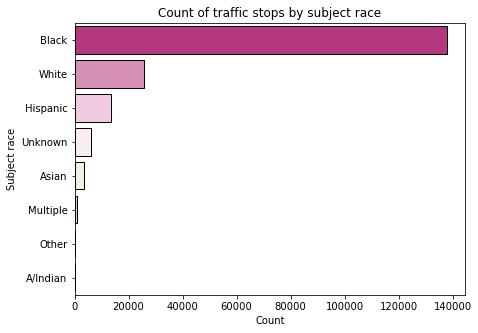

In [4]:
fig, ax = plt.subplots(figsize=(7, 5))
ax = sns.countplot(y="ETHNICITY", data=stops, palette='PiYG',
                   order = stops.ETHNICITY.value_counts().index, edgecolor='black')
ax.set(title = 'Count of traffic stops by subject race', xlabel='Count', ylabel='Subject race');

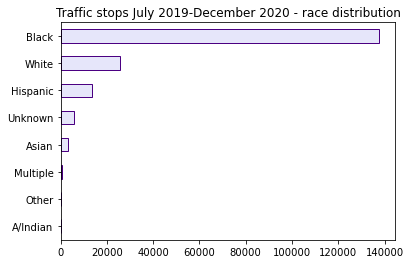

In [5]:
stops.ETHNICITY.value_counts(ascending=True).plot(kind='barh', color='lavender',edgecolor='indigo', title = 
                                                  'Traffic stops July 2019-December 2020 - race distribution');

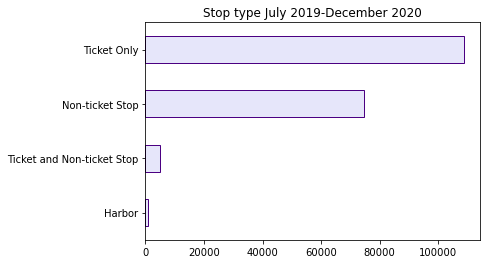

In [6]:
stops.STOP_TYPE.value_counts(ascending=True).plot(kind='barh', color='lavender',edgecolor='indigo', title = 
                                                  'Stop type July 2019-December 2020');

In [7]:
stops.STOP_REASON_NONTICKET.value_counts()

Call for service                                                                                                                                                                                                                           21422
Traffic violation                                                                                                                                                                                                                           8197
Individual<U+0092>s actions                                                                                                                                                                                                                 6794
Warrant/court order                                                                                                                                                                                                                         5978
BOLO/Lookout                        

In [8]:
#### way more analysis needed ####